In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn import metrics
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
bikedata = pd.read_csv("~/Downloads/SeoulBikeData.csv", encoding='cp1252')
bikedata.head(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [4]:
# look at rows (first number) and columns in data
bikedata.shape

(8760, 14)

In [82]:
bikedata["Date"] = pd.to_datetime(bikedata["Date"], format="%d/%m/%Y")
bikedata["Month"] = bikedata["Date"].dt.month
bikedata["Weekday"] = bikedata["Date"].dt.day_name()
bikedata.head(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Weekday
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,Friday
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,Friday
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,Friday
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,Friday
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,Friday


In [6]:
# Have overview of the data; total observations and features, missing values and data types
bikedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [7]:
# Check for missing values
bikedata.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
Month                        0
Weekday                      0
dtype: int64

In [8]:
bikedata.drop(columns = "Date", axis = 1, inplace = True)

In [9]:
# generate descriptive statistics
bikedata.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Month
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,6.526027
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,3.448048
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,1.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,4.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,7.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,10.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,12.000000


In [10]:
# Select numerical value
numerical_var = [var for var in bikedata.columns if bikedata[var].dtype != "O" ]
numerical_var

['Rented Bike Count',
 'Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Month']

In [11]:
# Select categorical value
categorical_var = [var for var in bikedata.columns if var not in numerical_var ]
categorical_var

['Seasons', 'Holiday', 'Functioning Day', 'Weekday']

In [12]:
seasons_distribution = bikedata['Seasons'].value_counts()
holiday_distribution = bikedata['Holiday'].value_counts()
function_distribution = bikedata['Functioning Day'].value_counts()
weekday_distribution = bikedata['Weekday'].value_counts()

print("Seasons Distribution:")
print(seasons_distribution)
print("\nHoliday Distribution:")
print(holiday_distribution)
print("\nfunction_distribution:")
print(holiday_distribution)
print("\nweekday_distribution:")
print(holiday_distribution)

Seasons Distribution:
Seasons
Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: count, dtype: int64

Holiday Distribution:
Holiday
No Holiday    8328
Holiday        432
Name: count, dtype: int64

function_distribution:
Holiday
No Holiday    8328
Holiday        432
Name: count, dtype: int64

weekday_distribution:
Holiday
No Holiday    8328
Holiday        432
Name: count, dtype: int64


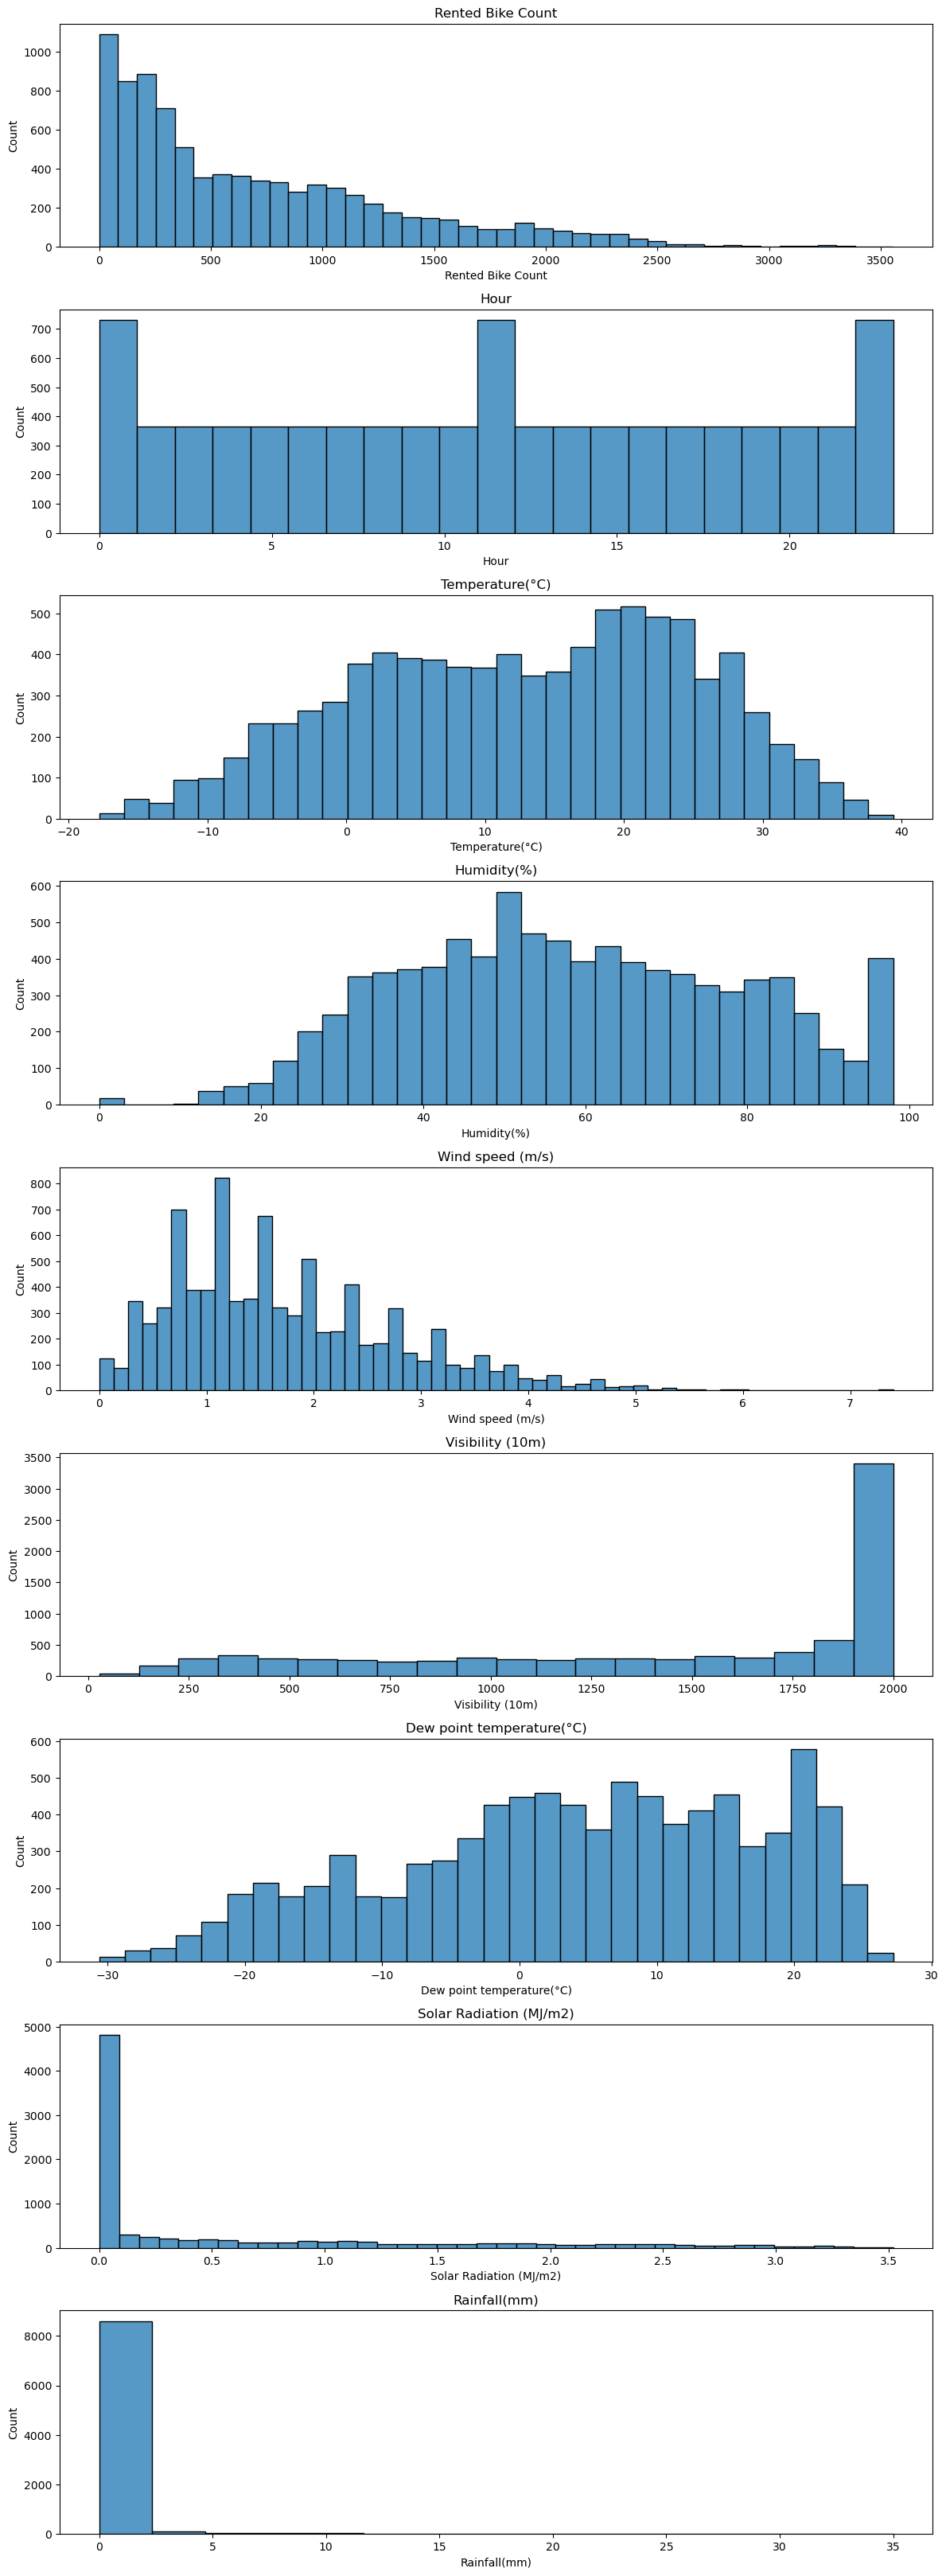

In [13]:
plt.figure(figsize = (12,50))
counter = 1
for var in numerical_var:
    if counter < 10:
        plt.subplot(14,1,counter)
        sns.histplot(x = var , data = bikedata)
        plt.title(var)
    counter += 1
plt.tight_layout()

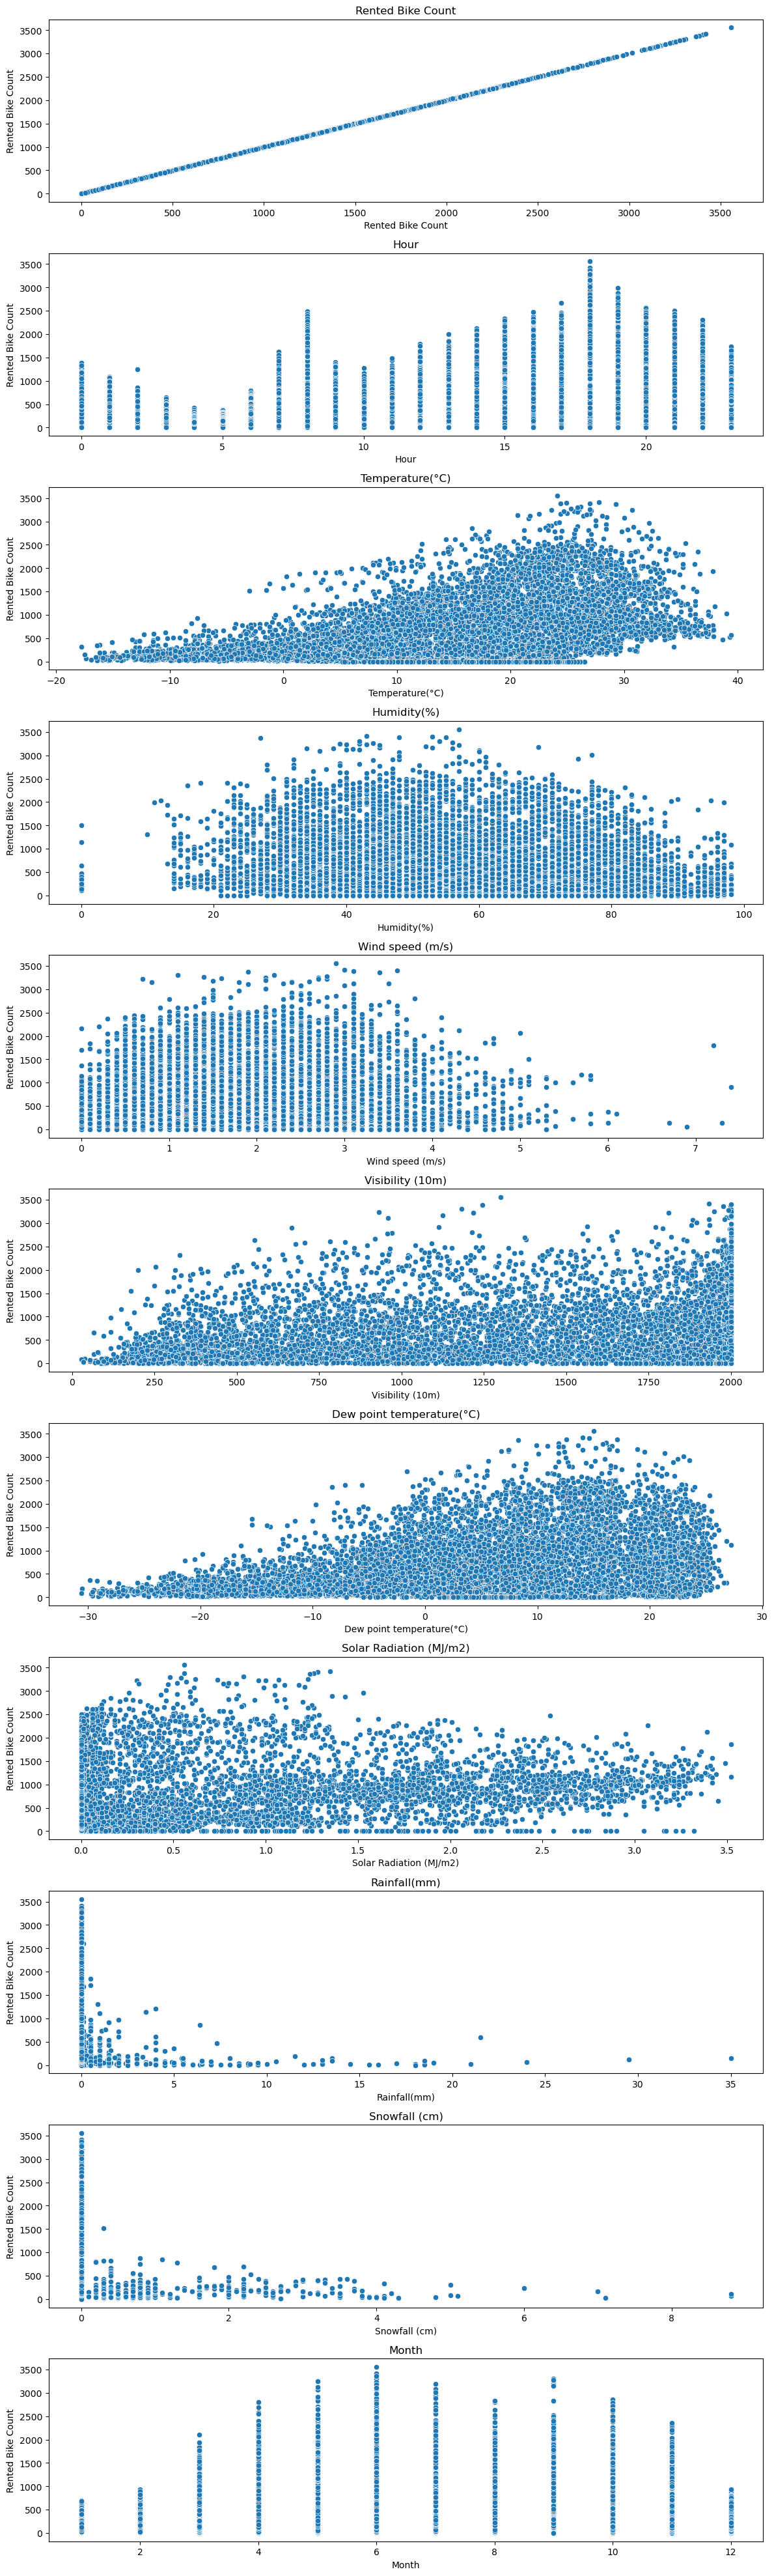

In [14]:
plt.figure(figsize = (12,50))
counter = 1
for var in numerical_var:
    if counter < 20:
        plt.subplot(14,1,counter)
        sns.scatterplot( x = var ,y = "Rented Bike Count" ,data = bikedata)
        plt.title(var)
    counter += 1
plt.tight_layout()

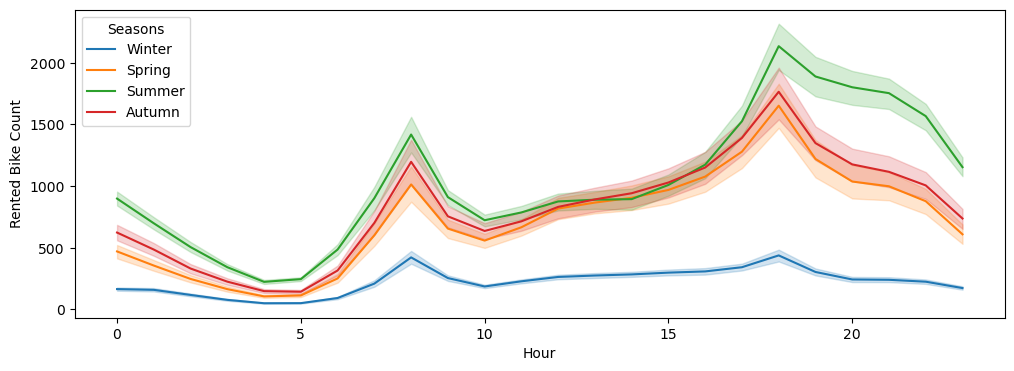

In [15]:
plt.figure(figsize = (12,4), dpi = 100)
graph = sns.lineplot(data = bikedata, x = "Hour", y = "Rented Bike Count", hue = "Seasons")

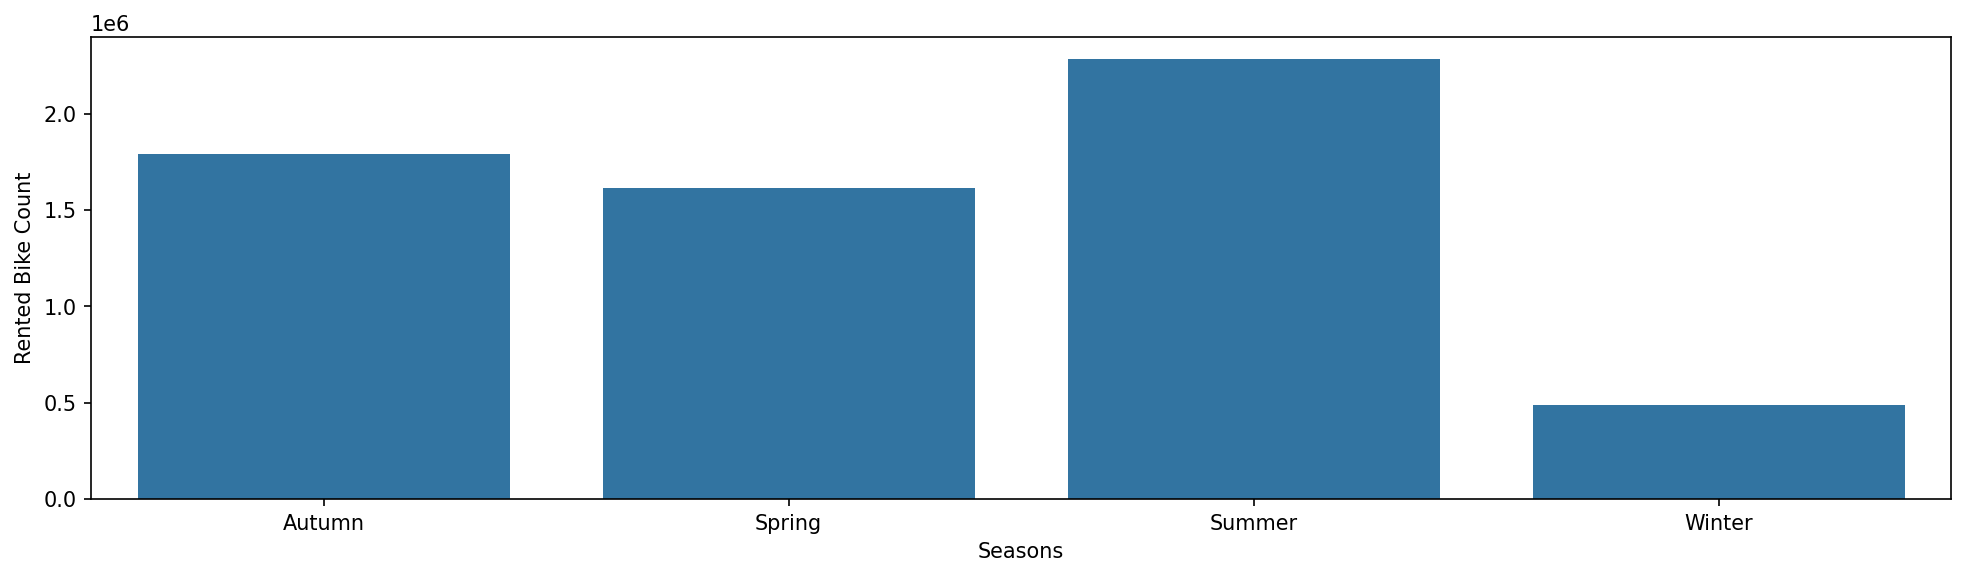

In [16]:
Season = bikedata.groupby("Seasons").sum().reset_index()
plt.figure(figsize = (16,4), dpi=150)
sns.barplot(x = "Seasons", y = "Rented Bike Count", data = Season)
plt.xticks();

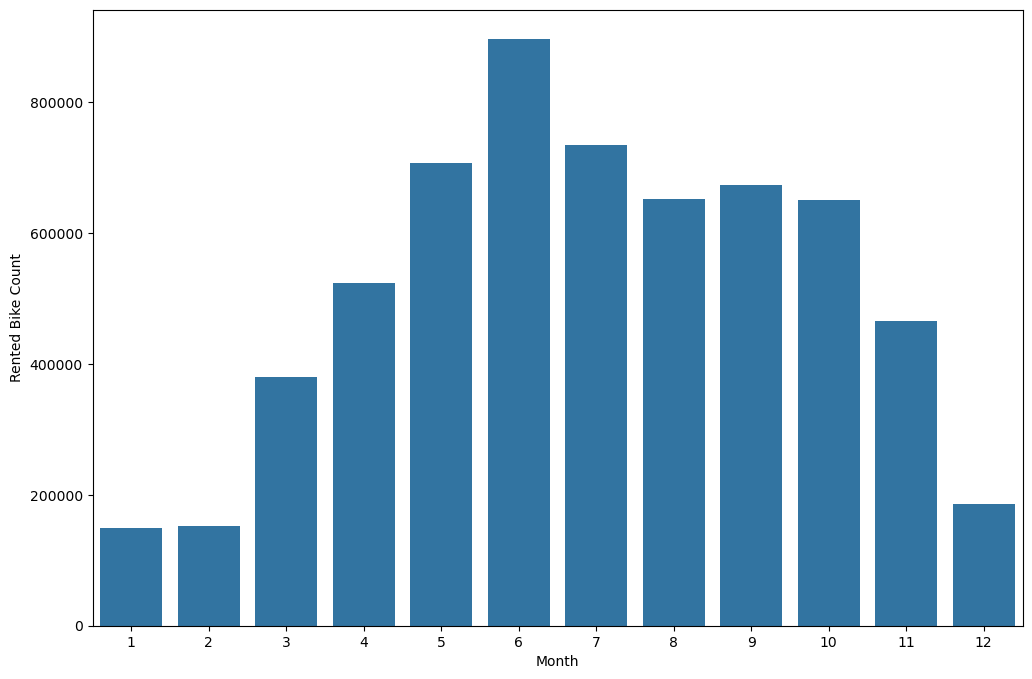

In [17]:
months = bikedata.groupby("Month").sum(numeric_only=True).reset_index()
plt.figure(figsize = (12,8))
sns.barplot(x = "Month", y = "Rented Bike Count", data = months )
plt.show()

Modeling

In [19]:
bikedata.drop(columns = ["Month", "Seasons","Weekday","Hour"], inplace = True)

In [20]:
bikedata.Holiday = bikedata.Holiday.map({"Holiday" : 1 , "No Holiday": 0})
bikedata['Functioning Day'] = bikedata['Functioning Day'].map({"Yes": 1 , "No": 0})

In [21]:
def categorize_bike_count(count):
    if count == 0:
        return 'No Rentals'
    elif count < 100:
        return 'Low Rentals'
    elif count < 300:
        return 'Medium Rentals'
    else:
        return 'High Rentals'
        
bikedata['Rental Category'] = bikedata['Rented Bike Count'].apply(categorize_bike_count)

In [22]:
bikedata.head(5)

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Rental Category
0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,1,Medium Rentals
1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,1,Medium Rentals
2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,1,Medium Rentals
3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,1,Medium Rentals
4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,1,Low Rentals


Model: SVM

In [24]:
bikedata.drop(columns = "Rented Bike Count",axis =1,inplace = True)

In [25]:
X = bikedata.drop(columns = "Rental Category", axis = 1)
y = bikedata["Rental Category"]

In [26]:
# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [27]:
# Function to calculate classification metrics
def classification_metrics(y_test, y_pred):
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1score = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    return acc, precision, recall, f1score

# Function for printing the metrics
def display_metrics(classifierName, y_test, y_pred):
    print("----------------------------------------------")
    print("Model: " + classifierName)
    acc, precision, recall, f1score = classification_metrics(y_test, y_pred)
    print("Accuracy: " + str(acc))
    print("Precision: " + str(precision))
    print("Recall: " + str(recall))
    print("F1-score: " + str(f1score))
    print("----------------------------------------------")
    print("")

In [28]:
# Hyperparameter Tuning for SVM
param_grid = {
    'C': [0.1, 1, 5, 10, 50],
    'gamma': [0.01, 0.1, 0.5, 1, 5],
    'kernel': ['linear', 'rbf']
}
grid_search = GridSearchCV(SVC(), param_grid, scoring='f1_weighted', cv=5)
grid_search.fit(X_train, y_train)

# Train the optimized SVM model
best_params = grid_search.best_params_
model_svm = SVC(C=best_params['C'], gamma=best_params['gamma'], kernel=best_params['kernel'], random_state=101)

# Train the model
model_svm.fit(X_train, y_train)

# Make predictions
y_pred = model_svm.predict(X_test)

# Display the metrics for the SVM model
display_metrics('SVM', y_test, y_pred)

----------------------------------------------
Model: SVM
Accuracy: 0.7899543378995434
Precision: 0.776723550193244
Recall: 0.7899543378995434
F1-score: 0.7792760227681071
----------------------------------------------



Model: Random Forest 

In [30]:
# Train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Display metrics for Random Forest
display_metrics('Random Forest', y_test, y_pred_rf)

----------------------------------------------
Model: Random Forest
Accuracy: 0.8002283105022832
Precision: 0.7921026500350001
Recall: 0.8002283105022832
F1-score: 0.7950454480538494
----------------------------------------------



Model: Gradient Boosting

In [32]:
# Train the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test)

# Display metrics for Gradient Boosting
display_metrics('Gradient Boosting', y_test, y_pred_gb)

----------------------------------------------
Model: Gradient Boosting
Accuracy: 0.7983257229832572
Precision: 0.7893565221068544
Recall: 0.7983257229832572
F1-score: 0.7919970874009775
----------------------------------------------



Multiple Linear Regression

In [34]:
bikedata = pd.read_csv("~/Downloads/SeoulBikeData.csv", encoding='cp1252')
bikedata.head(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [35]:
# Select numerical columns
numerical_var = [var for var in bikedata.columns if bikedata[var].dtype != "O"]

# Create a new DataFrame with only numerical columns
numerical_data = bikedata[numerical_var]
numerical_data

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0


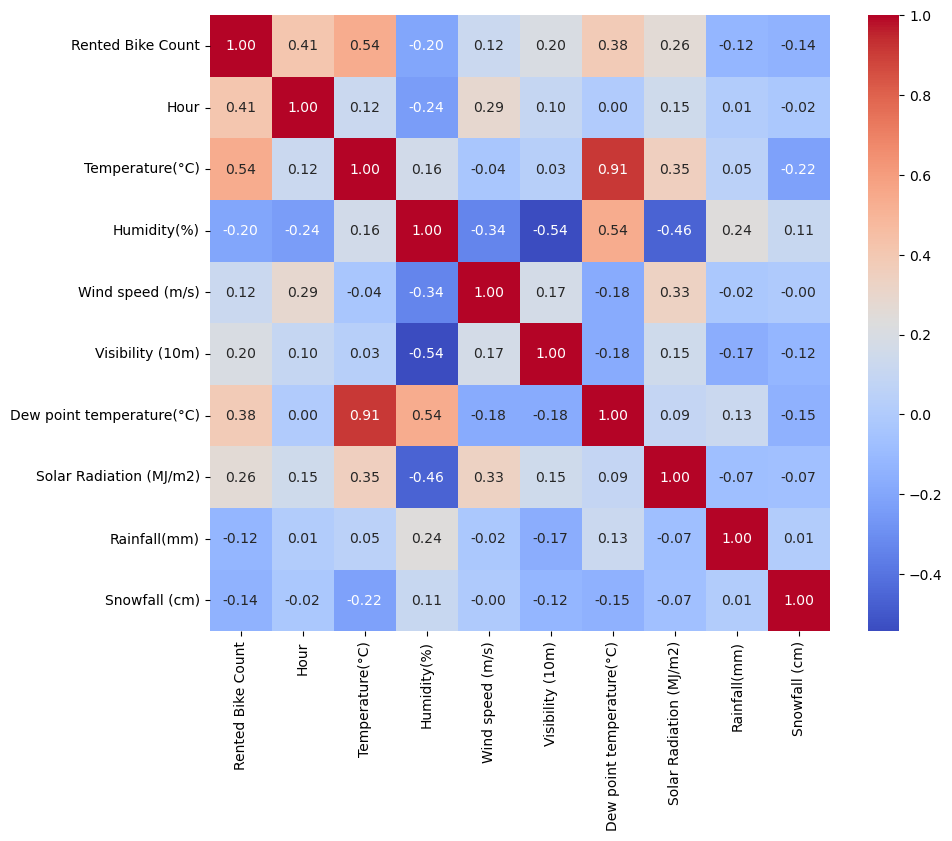

In [36]:
# Calculate correlation matrix
corr = numerical_data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

In [37]:
# Features and target variable
X = numerical_data.drop(columns=["Rented Bike Count"])
y = numerical_data["Rented Bike Count"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Add a constant to the input features for the intercept
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

# Build the model
model = sm.OLS(y_train, X_train_sm)
results = model.fit()

# Print the summary of the regression results
print(results.summary())

# Make predictions on the test set
y_pred = results.predict(X_test_sm)

                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     609.8
Date:                Wed, 23 Oct 2024   Prob (F-statistic):               0.00
Time:                        18:06:11   Log-Likelihood:                -46427.
No. Observations:                6132   AIC:                         9.287e+04
Df Residuals:                    6122   BIC:                         9.294e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 